In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# Importing the Dataset and performing EDA

In [ ]:
url = "https://data.ny.gov/api/views/k7j9-jnct/rows.csv?accessType=DOWNLOAD"
mta_2022 = pd.read_csv(url)

In [ ]:
# Load both datasets
mta_2021 = pd.read_csv("https://data.ny.gov/api/views/uu7b-3kff/rows.csv?accessType=DOWNLOAD")

In [ ]:
mta_2022.head()

,C/A,Unit,SCP,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548
1,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551
2,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594
3,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626
4,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657


In [ ]:
mta_2021.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/20/2021,00:00:00,REGULAR,7621953,2607461
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/20/2021,04:00:00,REGULAR,7621962,2607463
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/20/2021,08:00:00,REGULAR,7621971,2607505
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/20/2021,12:00:00,REGULAR,7622037,2607607
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/20/2021,16:00:00,REGULAR,7622194,2607644


In [ ]:
# Step 1: Creating a lookup table from mta_2021 with unique combinations of C/A, Unit, SCP, and Station
station_lookup = mta_2021[['C/A', 'Unit', 'SCP', 'Station']].drop_duplicates()

# Step 2: Merging the lookup with mta_2022 to add the Station column
mta_2022_with_station = pd.merge(
    mta_2022,
    station_lookup,
    on=['C/A', 'Unit', 'SCP'],
    how='left'  # Use left join to keep all rows from mta_2022
)

In [ ]:
mta_2022.columns

Index(['C/A', 'Unit', 'SCP', 'Line Name', 'Division', 'Date', 'Time',
       'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [ ]:
mta_2022.rename(columns={'Station_x': 'Station'}, inplace=True)

In [ ]:
# Selecting only the identifier columns + STATION from 2021 and drop duplicates
station_map = mta_2021[['C/A', 'Unit', 'SCP', 'Station']].drop_duplicates()

# Merging station names into 2022 dataset
mta_2022 = mta_2022.merge(station_map, on=['C/A', 'Unit', 'SCP'], how='left')

# Sanity Check
mta_2022[['C/A', 'Unit', 'SCP', 'Station']].head(20)

,C/A,Unit,SCP,Station
0,A002,R051,02-00-00,59 ST
1,A002,R051,02-00-00,59 ST
2,A002,R051,02-00-00,59 ST
3,A002,R051,02-00-00,59 ST
4,A002,R051,02-00-00,59 ST
5,A002,R051,02-00-00,59 ST
6,A002,R051,02-00-00,59 ST
7,A002,R051,02-00-00,59 ST
8,A002,R051,02-00-00,59 ST
9,A002,R051,02-00-00,59 ST


In [ ]:
del mta_2021

In [ ]:
mta_2022 = mta_2022.dropna()

In [ ]:
mta_2022.isna().sum()

,0
C/A,0
Unit,0
SCP,0
Line Name,0
Division,0
Date,0
Time,0
Description,0
Entries,0
Exits,0


In [ ]:
mta_2022.columns

Index(['C/A', 'Unit', 'SCP', 'Line Name', 'Division', 'Date', 'Time',
       'Description', 'Entries',
       'Exits                                                     ',
       'Station'],
      dtype='object')

In [ ]:
mta_2022.head()

,C/A,Unit,SCP,Line Name,Division,Date,Time,Description,Entries,Exits,Station
0,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,59 ST
1,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,59 ST
2,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,59 ST
3,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,59 ST
4,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,59 ST


Standardizing column names


In [ ]:
def standardize_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(r'\s', '_', regex=True)  # Replace any whitespace character(s)
    )
    return df


In [ ]:
standardize_column_names(mta_2022)
mta_2022.head()

,c/a,unit,scp,line_name,division,date,time,description,entries,exits,station
0,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,59 ST
1,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,59 ST
2,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,59 ST
3,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,59 ST
4,A002,R051,02-00-00,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,59 ST


In a perfect world we would have a 1-to-1 ratio for entries and exits. Everyone person entering and exiting from the train station would be accounted for. As we can see, that is not the case. The average for entries is significantly higher than the average number of exits. This suggests that a large amount of people who leave are not being tracked.

The missing information is likely due to people opting to exit from emergency exit doors which cannot record how many people pass through it, both for entries and exits.

In [ ]:
mta_2022['entries'].describe()

,entries
count,1.093337e+07
mean,4.241734e+07
std,2.221060e+08
min,0.000000e+00
25%,2.579540e+05
50%,1.345517e+06
75%,5.950550e+06
max,2.147338e+09


In [ ]:
mta_2022['exits'].describe()

,exits
count,1.093337e+07
mean,3.396266e+07
std,1.952118e+08
min,0.000000e+00
25%,1.416890e+05
50%,9.033190e+05
75%,3.954830e+06
max,2.147414e+09


Creating a column that indentifies each individual turnstile

In [ ]:
mta_2022['turnstile_id'] = mta_2022['c/a'] + ' ' + mta_2022['unit'] + ' ' + mta_2022['scp']
mta_2022['turnstile_id'].head()

,turnstile_id
0,A002 R051 02-00-00
1,A002 R051 02-00-00
2,A002 R051 02-00-00
3,A002 R051 02-00-00
4,A002 R051 02-00-00


In [ ]:
mta_2022.isnull().sum()

,0
c/a,0
unit,0
scp,0
line_name,0
division,0
date,0
time,0
description,0
entries,0
exits,0


There are no nulls in our dataset but is this really true?

In [ ]:
zero_counts = {
    'entries': (mta_2022['entries'] == 0).sum(),
    'exits': (mta_2022['exits'] == 0).sum()
}
print(zero_counts)

{'entries': np.int64(158031), 'exits': np.int64(437109)}


In [ ]:
mta_2022.groupby('turnstile_id').count()

,c/a,unit,scp,line_name,division,date,time,description,entries,exits,station
turnstile_id,,,,,,,,,,,
A002 R051 02-00-00,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185
A002 R051 02-00-01,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185,2185
A002 R051 02-03-00,2186,2186,2186,2186,2186,2186,2186,2186,2186,2186,2186
A002 R051 02-03-01,2186,2186,2186,2186,2186,2186,2186,2186,2186,2186,2186
A002 R051 02-03-02,2186,2186,2186,2186,2186,2186,2186,2186,2186,2186,2186
...,...,...,...,...,...,...,...,...,...,...,...
TRAM2 R469 00-00-01,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234
TRAM2 R469 00-03-00,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234
TRAM2 R469 00-03-01,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234,2234


I'm going to find the busiest stations. I think it's useful to visualize which areas are extremely likely to have the highest rates of fare evasion because of their overall traffic.

In [ ]:
# Sum entries and exits for each station
busiest_stations = (
    mta_2022.groupby('station')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])  # total traffic
    .sort_values('total', ascending=False)
)

# Show top 10 busiest stations
print(busiest_stations.head(10))


                        entries           exits           total
station                                                        
125 ST           17911867521880  15077186980153  32989054502033
42 ST-PORT AUTH  16491301940267  13695363359293  30186665299560
FULTON ST        15010490774427  12328493377588  27338984152015
23 ST            12549547262408  12650079367258  25199626629666
DEKALB AV        14422658207458   9651649825733  24074308033191
CANAL ST          8885515940526  11946566149915  20832082090441
34 ST-PENN STA    9999658319292   9930910594606  19930568913898
TIMES SQ-42 ST   10614890093948   8634205401165  19249095495113
161/YANKEE STAD   8634403961975   9031027322190  17665431284165
183 ST           10054249948276   6020697645438  16074947593714


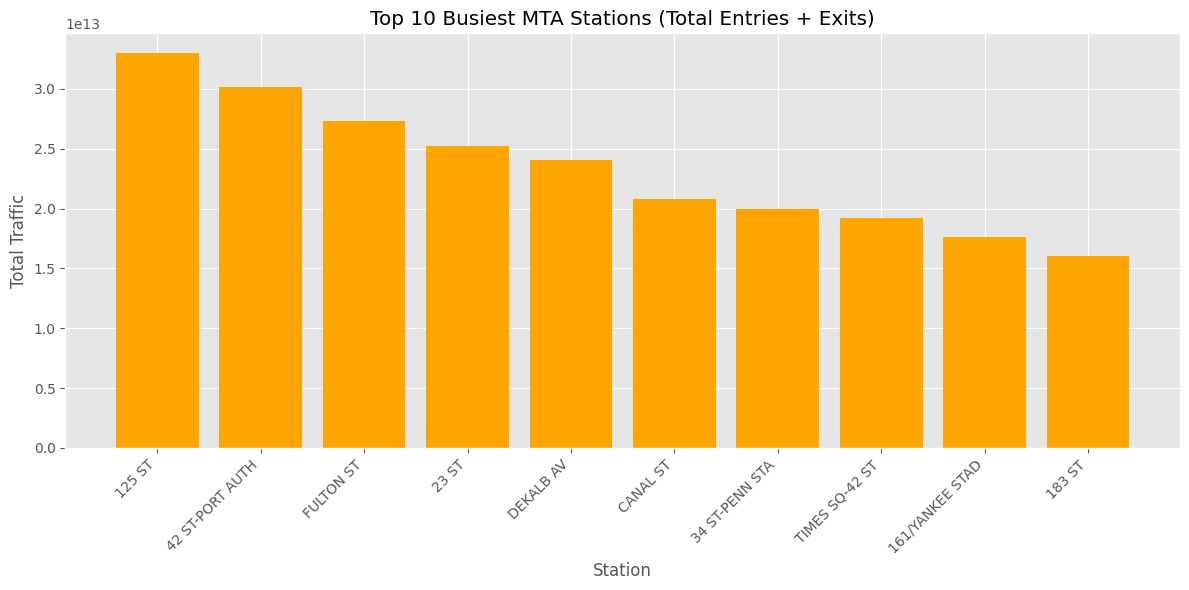

In [ ]:
# Getting the top 10 busiest stations
top10 = busiest_stations.head(10).reset_index()


plt.figure(figsize=(12, 6))
plt.bar(top10['station'], top10['total'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Busiest MTA Stations (Total Entries + Exits)")
plt.xlabel("Station")
plt.ylabel("Total Traffic")
plt.tight_layout()
plt.show()


I'm going to do the same for the train lines to see which are used the most.

In [ ]:
busiest_lines = (
    mta_2022.groupby('line_name')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
    .sort_values('total', ascending=False)
)

In [ ]:
# Step 1: Make a copy to avoid changing the original
lines_expanded = mta_2022.copy()

# Step 2: Split by space (e.g., "A C E" → ["A", "C", "E"])
lines_expanded['line_name'] = lines_expanded['line_name'].str.split()

# Step 3: Explode into multiple rows
lines_expanded = lines_expanded.explode('line_name')

# Step 4: Group by each individual line
busiest_individual_lines = (
    lines_expanded.groupby('line_name')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
    .sort_values('total', ascending=False)
)


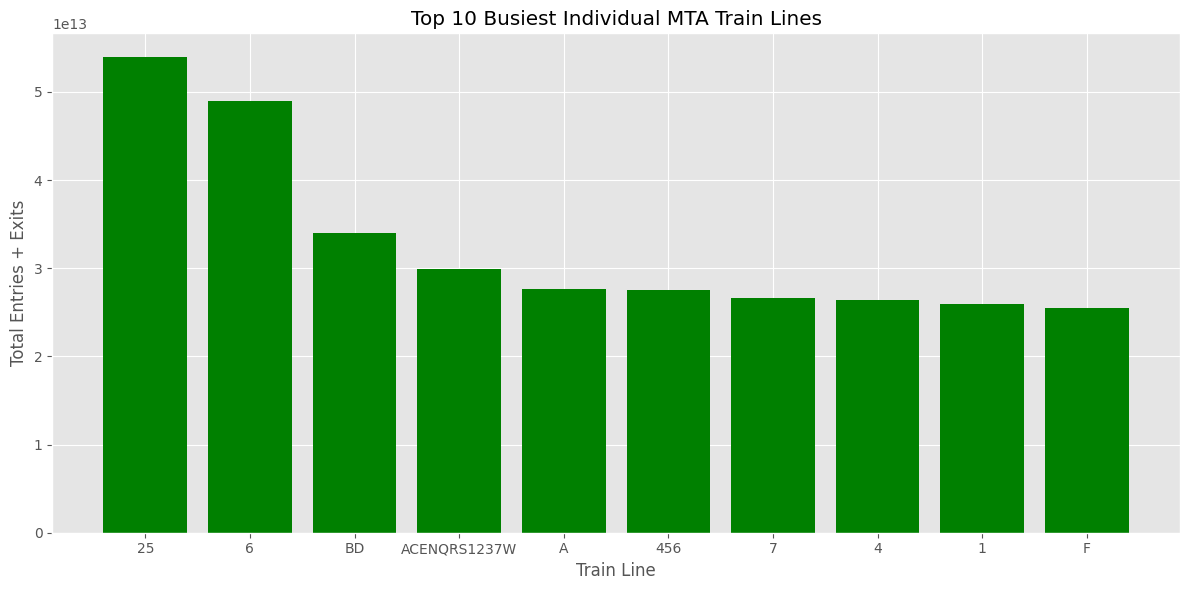

In [ ]:
top_lines = busiest_individual_lines.head(10).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(top_lines['line_name'], top_lines['total'], color='green')
plt.xticks(rotation=0)
plt.title("Top 10 Busiest Individual MTA Train Lines")
plt.xlabel("Train Line")
plt.ylabel("Total Entries + Exits")
plt.tight_layout()
plt.show()


Now I'm analyzing by time. This can give us an idea of when the MTA should request additional law enforcement presence to reduce the amount of fare evaders.

In [ ]:
# Strip AM/PM from the time strings
mta_2022['time'] = mta_2022['time'].str.replace(r'\s?(AM|PM)', '', regex=True)

# Now combine and convert
mta_2022['datetime'] = pd.to_datetime(mta_2022['date'] + ' ' + mta_2022['time'])


Extracting parts of the datetime obj so we can look at what days were most busy and what hours of the day were most busy.

In [ ]:
mta_2022['date_only'] = mta_2022['datetime'].dt.date
mta_2022['hour'] = mta_2022['datetime'].dt.hour

In [ ]:
daily_traffic = (
    mta_2022.groupby('date_only')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
)

In [ ]:
hourly_traffic = (
    mta_2022.groupby('hour')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
)


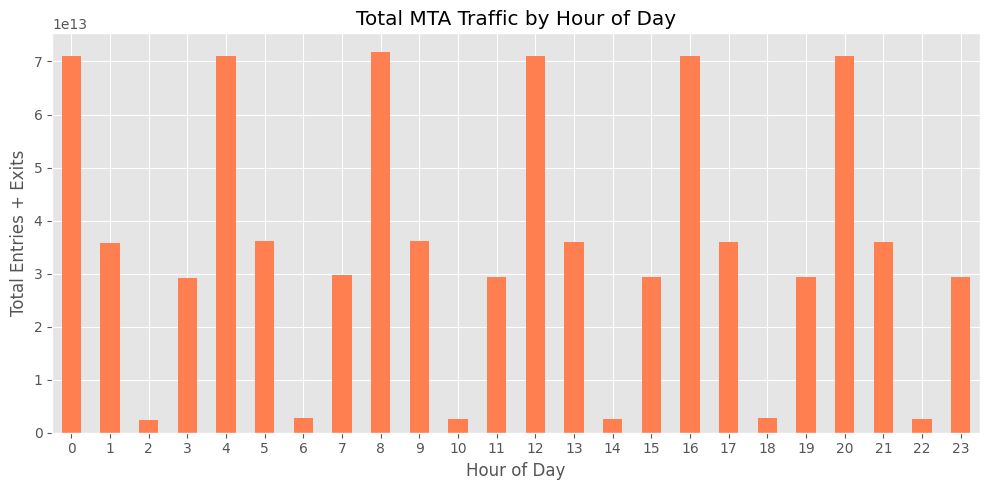

In [ ]:
hourly_traffic.plot(
    y='total', kind='bar', legend=False, figsize=(10, 5), color='coral',
    title='Total MTA Traffic by Hour of Day'
)
plt.xlabel("Hour of Day")
plt.ylabel("Total Entries + Exits")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

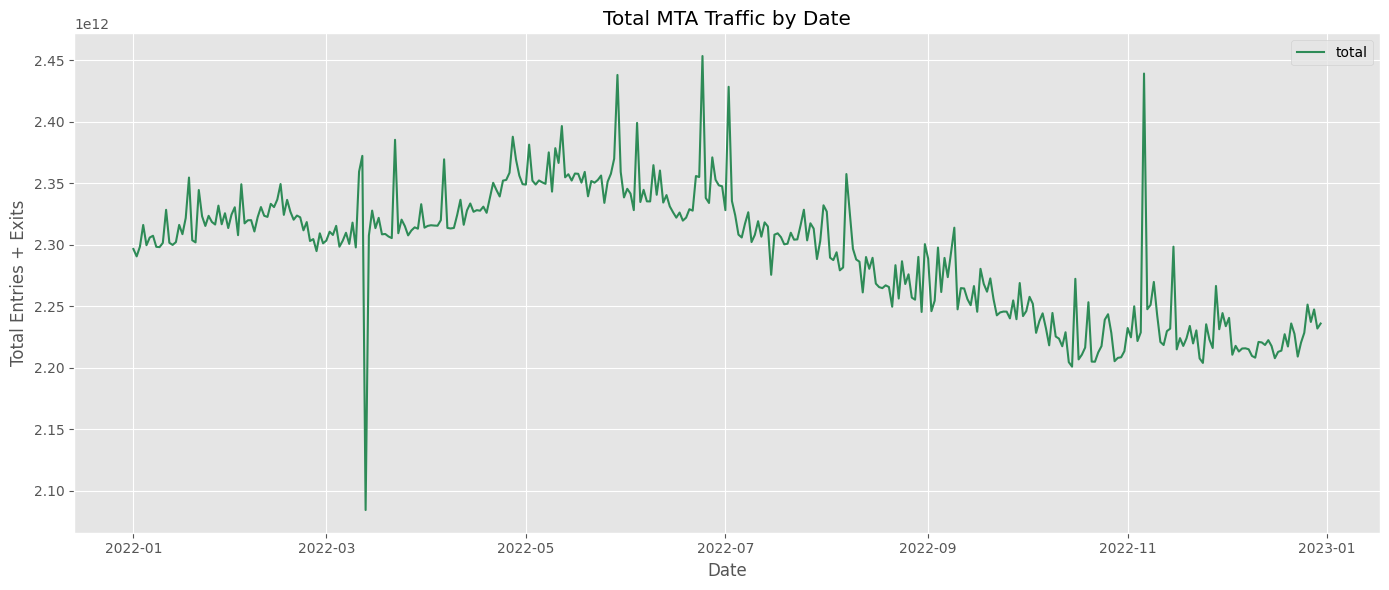

In [ ]:
daily_traffic.plot(
    y='total', figsize=(14, 6), title='Total MTA Traffic by Date', color='seagreen'
)
plt.xlabel("Date")
plt.ylabel("Total Entries + Exits")
plt.tight_layout()
plt.show()


Which days of the week are the most busy? Additional law enforcement then could also be beneficial.

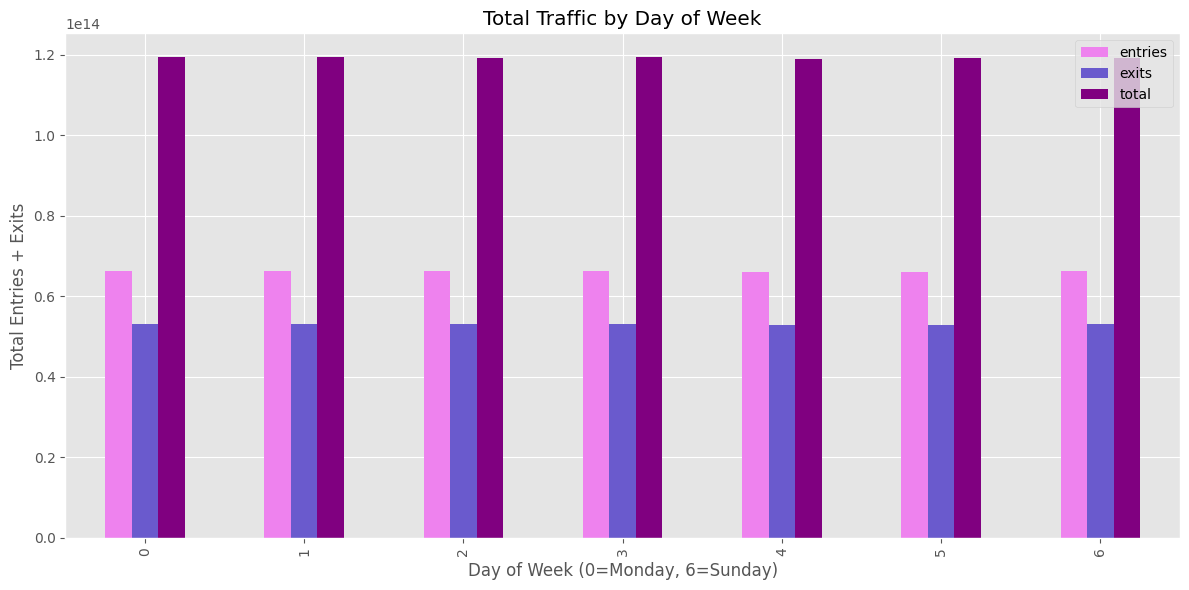

In [ ]:
mta_2022['weekday'] = mta_2022['datetime'].dt.weekday  # Monday = 0, Sunday = 6

weekly_traffic = (
    mta_2022.groupby('weekday')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
)

# Plot
weekly_traffic.plot(kind='bar', figsize=(12, 6), title='Total Traffic by Day of Week', color=['violet', 'slateblue', 'purple'])
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Total Entries + Exits")
plt.tight_layout()
plt.show()


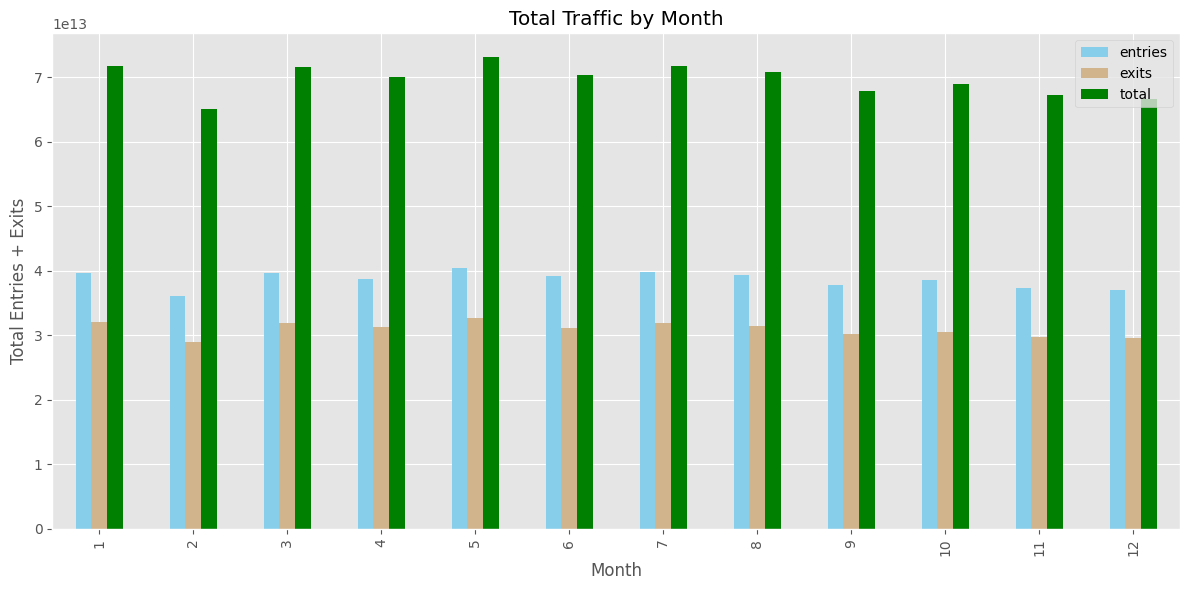

In [ ]:
mta_2022['month'] = mta_2022['datetime'].dt.month

monthly_traffic = (
    mta_2022.groupby('month')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
)

monthly_traffic.plot(kind='bar', figsize=(12, 6), title='Total Traffic by Month', color=['skyblue', 'tan', 'green'])
plt.xlabel('Month')
plt.ylabel('Total Entries + Exits')
plt.tight_layout()
plt.show()


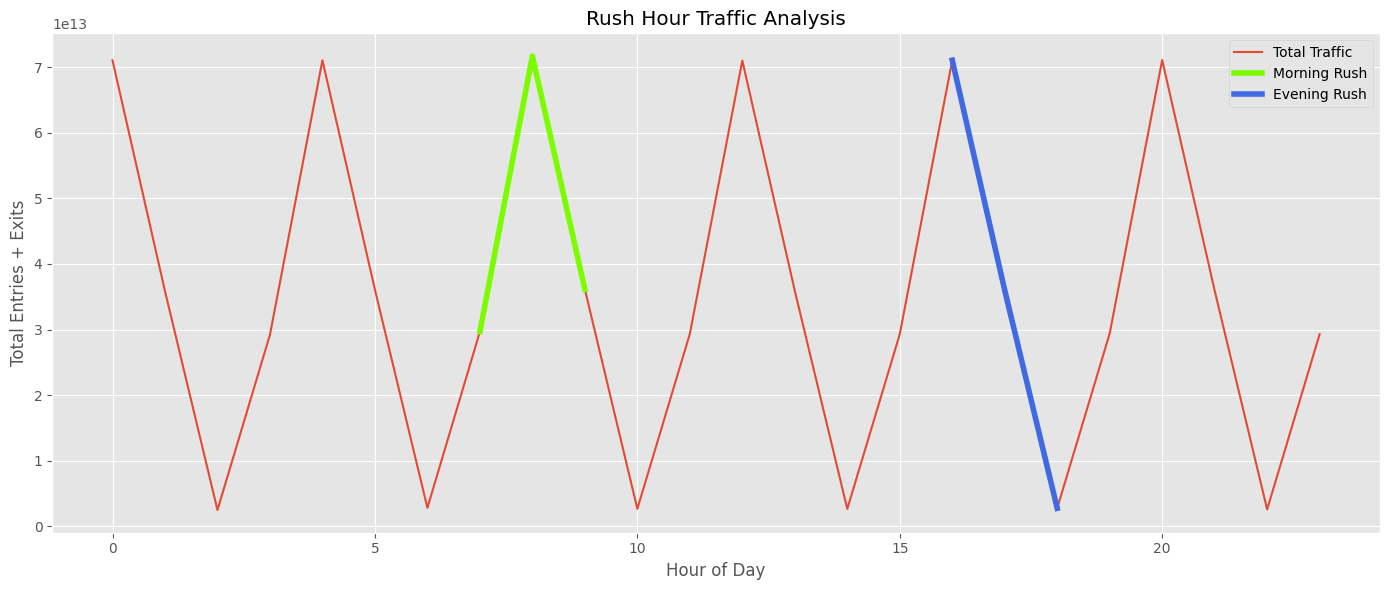

In [ ]:
# Group by hour and summarize
hourly_traffic = (
    mta_2022.groupby('hour')[['entries', 'exits']]
    .sum()
    .assign(total=lambda df: df['entries'] + df['exits'])
)

# Highlight rush hours (e.g., 7AM-9AM and 4PM-6PM)
rush_hours = hourly_traffic.loc[(hourly_traffic.index >= 7) & (hourly_traffic.index <= 9)]
evening_rush = hourly_traffic.loc[(hourly_traffic.index >= 16) & (hourly_traffic.index <= 18)]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(hourly_traffic.index, hourly_traffic['total'], label='Total Traffic')
plt.plot(rush_hours.index, rush_hours['total'], label='Morning Rush', color='lawngreen', linewidth=4)
plt.plot(evening_rush.index, evening_rush['total'], label='Evening Rush', color='royalblue', linewidth=4)
plt.title('Rush Hour Traffic Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Total Entries + Exits')
plt.legend()
plt.tight_layout()
plt.show()